# Regresión Logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

### 1. Pre-procesado de datos

Convertimos todos los valores de la columna "y" en numéricos: "yes" = 1, "no" = 0.

In [7]:
data["y"] = (data["y"] == "yes").astype(int)

In [8]:
data["y"].tail()

4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, dtype: int64

En este caso solo nos interesa en nivel de educación "basic", por lo que quitaremos la información adicional.

In [9]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


Renombraremos los valores de las variables de "education" para mayor comprensión

In [11]:
data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])

In [12]:
data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [13]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

## Análisis

Analizamos la columna 'y' para determinar cuantas personas compraron el producto y=1 y cuantas no y=0

In [14]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

Hacemos un análisis exploratorio simple del promedio de la información de las personas que compraron y no los productos.

In [15]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [16]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


## Visualización de los datos

In [17]:
import matplotlib.pyplot as plt

Se analizará si el nivel de estudios influye en la compra del producto

Text(0, 0.5, 'Frecuencia de compra del producto')

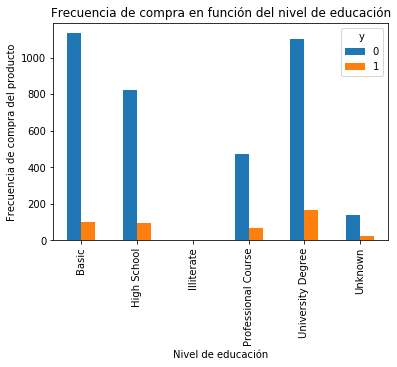

In [18]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

Se analizará si el estado civil influye en la compra

Text(0, 0.5, 'Proporcion de clientes')

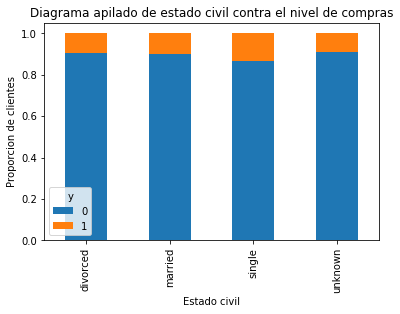

In [19]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

Conclución: El estado civil no influye demasiado.

Averiguar si hay un día de la semana donde exista un cambio significativo en la compra del producto.

Text(0, 0.5, 'Frecuencia de compra del producto')

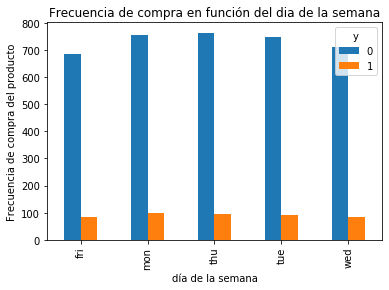

In [20]:
table = pd.crosstab(data.day_of_week, data.y).plot(kind = "bar")

plt.title("Frecuencia de compra en función del dia de la semana")
plt.xlabel("día de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

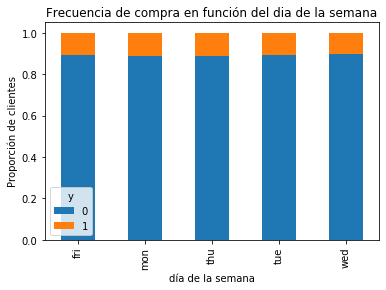

In [21]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función del dia de la semana")
plt.xlabel("día de la semana")
plt.ylabel("Proporción de clientes")

Conclusión: no existe diferencia en cuanto a los días de la semana

#### Por mes del año

Text(0, 0.5, 'Frecuencia de compra del producto')

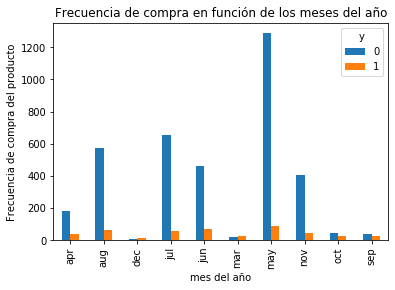

In [22]:
table = pd.crosstab(data.month, data.y).plot(kind = "bar")

plt.title("Frecuencia de compra en función de los meses del año")
plt.xlabel("mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporción de clientes')

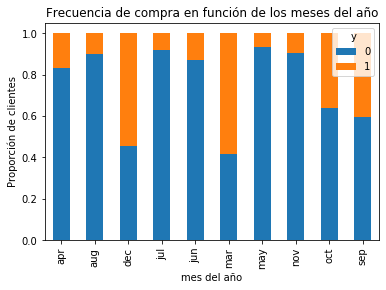

In [23]:
%matplotlib inline
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en función de los meses del año")
plt.xlabel("mes del año")
plt.ylabel("Proporción de clientes")

Conclusión: existe un mayor rechazo de los clientes en los meses de mayo y julio, hay más clientes que compran más el producto en el mes de diciembre y marzo que lo que lo rechazan.

Text(0, 0.5, 'Clientes')

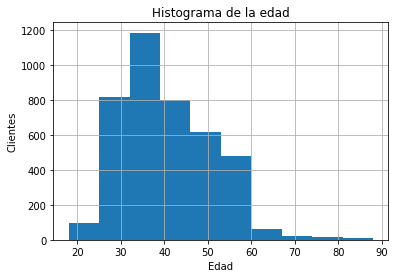

In [24]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Clientes")

Conclusión: la gente entre los 20 y 60 están más interesadas en adquirir el producto

Experiencia previa con el producto

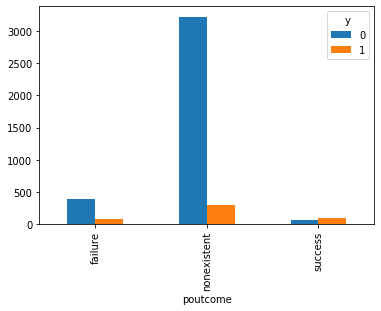

In [25]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Conversión de las variables categóricas a dummies

Señalamos las variables categóricas que queremos se conviertan en dummies

In [26]:
categories = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix = category)
    data = data.join(cat_dummies)

In [27]:
data_vars = data.columns.values.tolist()

In [28]:
to_keep = [x for x in data_vars if x not in categories]

In [29]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [30]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [x for x in bank_data_vars if x not in Y]

### Selección de rasgos del modelo

In [31]:
n = 13

In [32]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()

In [34]:
rfe = RFE(lr, n)
rfe.fit(bank_data[X], bank_data[Y].values.ravel())

/home/johnrpk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/johnrpk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=13, step=1, verbose=0)

In [35]:
print(rfe.support_)

[False False False False False False False False  True False False  True
  True False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False  True  True  True
  True  True False False False False False False False False  True False
  True]


In [36]:
print(rfe.ranking_)

[39 38 14 43 46  9 23 18  1 31  6  1  1 40  1  3  1 22 41  5  4 45 12 33
 25 48 24 10 47 19 28  2 30 29 49  7 15 42 11 16 27  8  1 35 17  1  1  1
  1  1 13 26 44 36 32 21 37 34  1 20  1]


In [37]:
z=zip(bank_data_vars,rfe.support_, rfe.ranking_)

In [38]:
list(z)

[('age', False, 39),
 ('duration', False, 38),
 ('campaign', False, 14),
 ('pdays', False, 43),
 ('previous', False, 46),
 ('emp.var.rate', False, 9),
 ('cons.price.idx', False, 23),
 ('cons.conf.idx', False, 18),
 ('euribor3m', True, 1),
 ('nr.employed', False, 31),
 ('y', False, 6),
 ('job_admin.', True, 1),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 40),
 ('job_housemaid', True, 1),
 ('job_management', False, 3),
 ('job_retired', True, 1),
 ('job_self-employed', False, 22),
 ('job_services', False, 41),
 ('job_student', False, 5),
 ('job_technician', False, 4),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 12),
 ('marital_divorced', False, 33),
 ('marital_married', False, 25),
 ('marital_single', False, 48),
 ('marital_unknown', False, 24),
 ('education_Basic', False, 10),
 ('education_High School', False, 47),
 ('education_Illiterate', False, 19),
 ('education_Professional Course', False, 28),
 ('education_University Degree', False, 2),
 ('education_Unkno

In [39]:
z = list(zip(bank_data_vars, rfe.support_))

In [40]:
col_lr = [c[0] for c in z if c[1]]

In [41]:
col_lr

['euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_housemaid',
 'job_retired',
 'contact_cellular',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'day_of_week_wed',
 'poutcome_nonexistent']

In [42]:
X = bank_data[col_lr]
Y = bank_data["y"]

## Implementación del modelo de regresión (Statsmodels)

In [43]:
import statsmodels.api as sm

In [44]:
logit_model = sm.Logit(Y, X)

In [45]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291264
         Iterations 7


In [46]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.157     
Dependent Variable:   y                 AIC:               2425.4351 
Date:                 2022-05-04 21:09  BIC:               2507.6389 
No. Observations:     4119              Log-Likelihood:    -1199.7   
Df Model:             12                LL-Null:           -1422.9   
Df Residuals:         4106              LLR p-value:       5.4682e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.5977   0.0361 -16.5628 0.0000 -0.6684 -0.5270
job_admin.            0.1172   0.1242   0.9439 0.3452 -0.1262  0.3607
job_blue-collar      -0.4405   0.1568  -2.8085 0.0050 -0.7479 -0.1331
job_housemaid         0.0894   0.3472   0.2575 0.7968 -0.5911  0.7699
job_retired           0.3085   0.2212   1.3945 0.1632 -0.1251  0.7421
contact_cellular     -0.2956   0.0944  -3.1312 0.0017 -0.4807 -0.1106
month_aug             0.6134   0.1742   3.5214 0.0004  0.2720  0.9548
month_dec             1.1599   0.4466   2.5971 0.0094  0.2846  2.0353
month_jul             1.0147   0.1848   5.4903 0.0000  0.6524  1.3769
month_jun             0.9398   0.1668   5.6334 0.0000  0.6128  1.2668
month_mar             1.6661   0.3135   5.3142 0.0000  1.0516  2.2806
day_of_week_wed      -0.0253   0.1385  -0.1825 0.8552 -0.2967  0.2462
poutcome_nonexistent -0.5875   0.1231  -4.7718 0.0000 -0.8288 -0.3462
=====================================================================

"""

## Implementación con Scikit-learn

In [47]:
from sklearn import linear_model

In [48]:
logit_model = linear_model.LogisticRegression()

In [49]:
logit_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
logit_model.score(X, Y)

0.8951201747997086

In [51]:
1-Y.mean()

0.8905074047098811

#### Comparación de la eficacia del modelo

In [52]:
logit_model.score(X, Y)-1+Y.mean()

0.004612770089827578

Coeficientes del modelo:

In [53]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,euribor3m,[-0.5107403361477467]
1,job_admin.,[0.24888498852672164]
2,job_blue-collar,[-0.3080835890776549]
3,job_housemaid,[0.19298080671979306]
4,job_retired,[0.45540903676531347]
5,contact_cellular,[0.26802739748912874]
6,month_aug,[0.5049293160844138]
7,month_dec,[1.1313170386931473]
8,month_jul,[0.8090873031472328]
9,month_jun,[1.073684684607887]


# Validación del modelo

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

Aquí creamos el modelo con el conjunto de entrenamiento del 70%

In [56]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
from IPython.display import display, Math, Latex

In [58]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p > 0.5\end{cases}'))

<IPython.core.display.Math object>

Se obtiene las probabilidades a partir del modelo, utilizando el conjunto de prueba. Si el valor de la probabilidad p es menor o igual que 0.5, el valor de Yp será de 1 y, por lo tanto, se considera como compra; si no, Yp será 0 y se considera como no compra.

In [59]:
probs = lm.predict_proba(X_test)

In [60]:
probs

array([[0.95867281, 0.04132719],
       [0.84286035, 0.15713965],
       [0.9437425 , 0.0562575 ],
       ...,
       [0.65028162, 0.34971838],
       [0.97915868, 0.02084132],
       [0.52886266, 0.47113734]])

Se considera la segunda columna de probs para obtener las probabilidades.

In [61]:
prediction = lm.predict(X_test)

In [62]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

Debido a que el porcentaje 0.5 lo consideramos un valor muy drástico para el análisis, nosotros podemos considerar imponer un valor threshold que sea más generoso, sobretodo porque consideramos que el dataset existe un sesgo de poca población que considere comprar. Por lo que dicho threshold podría definirse de la siguiente forma:

In [63]:
display(Math(r'\varepsilon\in(0,1), Y_p=\begin{cases}0& si\ p\leq\varepsilon\\1&si\ p > \varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [64]:
prob = probs[:,1]
prob_df = pd.DataFrame(probs[:,1])
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.041327,0
1,0.157140,1
2,0.056258,0
3,0.082081,0
4,0.032617,0


In [65]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,848
1,388


In [66]:
from sklearn import metrics

In [67]:
metrics.accuracy_score(Y_test, prediction)

0.9004854368932039

## Validación cruzada

Utilizada para que el modelo predictivo no sufra de overfitting.
Método estandar: división de un dataset entre un conjunto de entrenamiento y de testing.

In [69]:
from sklearn.model_selection import cross_val_score

In [85]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

### Puntuación de validación cruzada.
scores = son la puntuaciones de la validación cruzada. En los parámetros de cross_val_score agregamos: el modelo de regresión logística, todo el dataset de entrada X, todo el dataset de salida Y, objetivo = mejor eficacia del modelo "accuracy", cross valitation cv = 10 (numero de particiones).


In [86]:
scores

array([0.90048544, 0.88349515, 0.89563107, 0.8907767 , 0.89563107,
       0.89320388, 0.88592233, 0.89320388, 0.8907767 , 0.88807786])

In [87]:
scores.mean()

0.8917204072473013

# Matrices de Confusión y curvas ROC

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [89]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
probs = lm.predict_proba(X_test)

In [94]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.041327,0,0
1,0.157140,1,0
2,0.056258,0,0
3,0.082081,0,0
4,0.032617,0,0


In [95]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,808,40
1,306,82


In [96]:
TN = confusion_matrix[0][0] #true negativo
TP = confusion_matrix[1][1] #true positivo
FN = confusion_matrix[0][1] #false negativo
FP = confusion_matrix[1][0] #false positivo

In [100]:
sens = TP/(TP + FN) #sensibilidad
print("Sensibilidad del "+str(sens * 100) + " %")

Sensibilidad del 21.1340206185567 %


In [101]:
espc_1 = 1 - TN / (TN+FP)
espc_1

0.047169811320754707